## Logistic Regression with Python 
## Titanic Dataset EDA (Exploring, Data, Analysis) 

We will be trying to predict a classification- survival or deceased. 



## Importing the Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

## Importing Dataset

In [2]:
train = pd.read_csv('/Users/nicomellein/Documents/DataScience/Data Science Kaggle/Titanic Logistic-Regression/train.csv')

In [3]:
train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# 1. Data Analysis Phase main aim is to unterstand more about the data

In [4]:
print(train.shape)



(891, 12)


1. Missing Values 
2. Alle the Numerical Varaibles 
3. Distrubution of the Numercial Variables 
4. Categorical Variables 
5. Cardibility of Categorical Variables 
6. Outliers 
7. Relationship beetween independet and dependet feature 

# 1. Missing Values 

In [5]:
## Check of percentage Missing Values of NaN 
## There are a lots of posibilites for checking Missing Values 
## Step 1- Make a list of features which has missing values

features_nan=[features for features in train.columns if train[features].isnull().sum()>1]

## Step 2- print the feature name and percentage of missing values 

for feature in features_nan: 
    print(feature, np.round(train[feature].isnull().mean(), 4), ' % missing Values')



Age 0.1987  % missing Values
Cabin 0.771  % missing Values
Embarked 0.0022  % missing Values


In [6]:
## We´ve got not many missing Values onlny Age, Cabin and Embarked 
## other posibilite to Check missing Values is using a Heatmap

<AxesSubplot:>

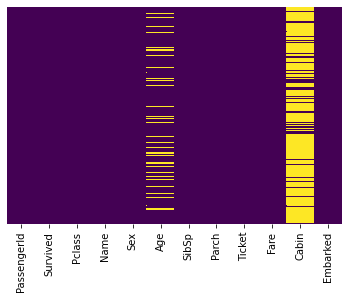

In [7]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
## approximately 20 percent of Age data is missing. Looking of the Cabin column its looks like we missing 
## to much of the Data

Lets continue on by visualizing some more of the data. 

(891, 12)


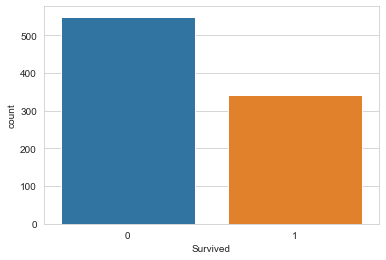

In [9]:
sns.set_style(style='whitegrid')
sns.countplot(x='Survived', data=train)
print(train.shape)

<AxesSubplot:xlabel='Survived', ylabel='count'>

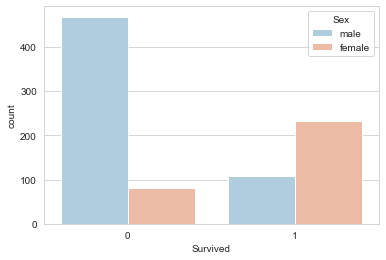

In [10]:
sns.set_style(style='whitegrid')
sns.countplot(x='Survived',hue='Sex',  data=train, palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

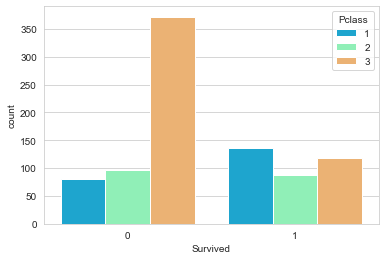

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')

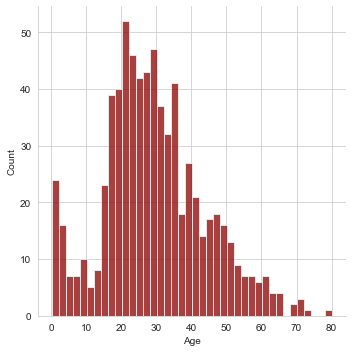

In [12]:
sns.displot(train['Age'].dropna(),kde=False, color='darkred', bins=40)

In [13]:
print(train.Age.median())



28.0


<AxesSubplot:>

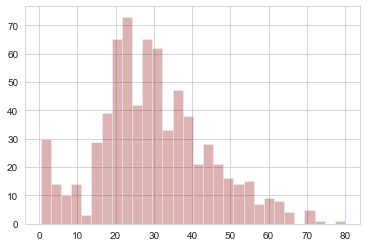

In [14]:
train['Age'].hist(bins=30, color='darkred', alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

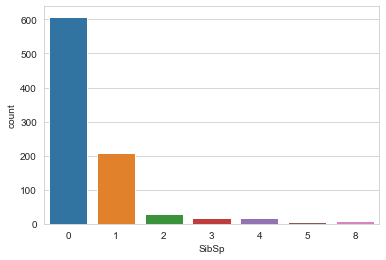

In [15]:
##sibsp - Number of Siblings/Spouses Aboard 
##sibsp - Anzahl der Geschwister / Ehepartner an Bord)
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

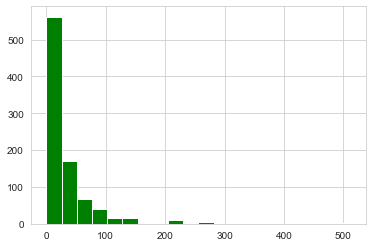

In [16]:
##fare - Passenger Fare / Passagier Tarif

train['Fare'].hist(color='green', bins =20)

# Data Cleaning

fill missing data (Age Data, instead of dropping the missing data rows. Filling the mean age of passenger by missing data

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

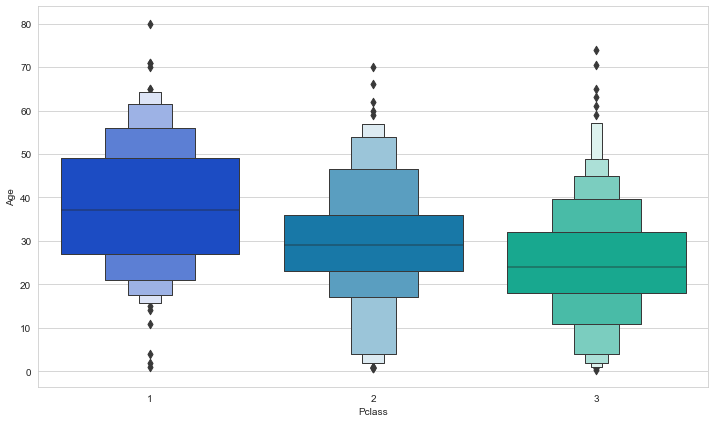

In [17]:
## Outliers 
plt.figure(figsize=(12, 7))
sns.boxenplot(x='Pclass', y='Age', data=train, palette='winter')


In [18]:
##We can see the wealthier passengers in the higher classes tend to be older, which makes sense. 
##We'll use these average age values to impute based on Pclass for Age.

In [19]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [20]:
## now apply that function 

train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [21]:

features_nan=[features for features in train.columns if train[features].isnull().sum()>1]

## Step 2- print the feature name and percentage of missing values 

for feature in features_nan: 
    print(feature, np.round(train[feature].isnull().mean(), 4), ' % missing Values')



Cabin 0.771  % missing Values
Embarked 0.0022  % missing Values


<AxesSubplot:>

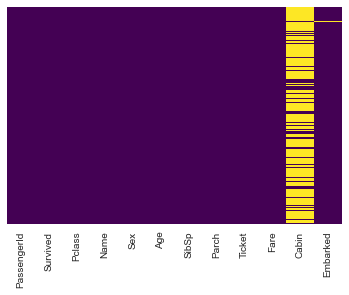

In [22]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [23]:
train = train.dropna()

<AxesSubplot:>

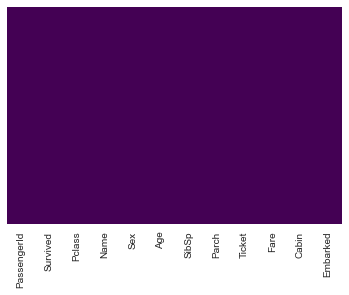

In [24]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
train.drop('Cabin', axis=1, inplace=True)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S


In [27]:
train = train.dropna()

# Converting Categorical Features

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 889
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  202 non-null    int64  
 1   Survived     202 non-null    int64  
 2   Pclass       202 non-null    int64  
 3   Name         202 non-null    object 
 4   Sex          202 non-null    object 
 5   Age          202 non-null    float64
 6   SibSp        202 non-null    int64  
 7   Parch        202 non-null    int64  
 8   Ticket       202 non-null    object 
 9   Fare         202 non-null    float64
 10  Embarked     202 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 18.9+ KB


In [29]:
## We'll need to convert categorical features to dummy variables using pandas! 
##Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [30]:
categorical_features = [feature for feature in train.columns if train[feature].dtype=='O']

In [31]:
categorical_features

['Name', 'Sex', 'Ticket', 'Embarked']

In [32]:
pd.get_dummies(train['Embarked'], drop_first=True).head()

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


In [33]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first= True)

In [34]:
train.drop(['Sex', 'Embarked', 'Ticket', 'Name'], axis = 1, inplace=True )

In [35]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
1,2,1,1,38.0,1,0,71.2833
3,4,1,1,35.0,1,0,53.1000
6,7,0,1,54.0,0,0,51.8625
10,11,1,3,4.0,1,1,16.7000
11,12,1,1,58.0,0,0,26.5500


In [36]:
train = pd.concat([train, sex, embark], axis=1)


In [37]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,2,1,1,38.0,1,0,71.2833,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1
6,7,0,1,54.0,0,0,51.8625,1,0,1
10,11,1,3,4.0,1,1,16.7000,0,0,1
11,12,1,1,58.0,0,0,26.5500,0,0,1


# Building a Logistic Regression model


In [38]:
## Splitting dateset into train and test data 

In [39]:
## Capture the dependent feature 
y = train[['Survived']]


In [40]:
X = train[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]

In [42]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,2,1,38.0,1,0,71.2833,0,0,0
3,4,1,35.0,1,0,53.1000,0,0,1
6,7,1,54.0,0,0,51.8625,1,0,1
10,11,3,4.0,1,1,16.7000,0,0,1
11,12,1,58.0,0,0,26.5500,0,0,1


In [43]:
y.head()

,Survived
1,1
3,1
6,0
10,1
11,1


In [54]:
from sklearn.model_selection import train_test_split

In [58]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [59]:
from sklearn.linear_model import LogisticRegression

In [61]:
regressor = LogisticRegression()

In [62]:
regressor.fit(X_train, y_train)

/Users/nicomellein/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/nicomellein/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
predictions = logmodel.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:

accuracy=confusion_matrix(y_test,predictions)

In [67]:
accuracy

array([[14,  9],
       [ 7, 37]])

In [70]:
from sklearn.metrics import accuracy_score

accuracy_score = accuracy_score(y_test, predictions)
accuracy_score

0.7611940298507462

# Evaluation 

In [71]:
from sklearn.metrics import classification_report

In [72]:
eva = classification_report(y_test, predictions)

In [74]:
print(eva)

              precision    recall  f1-score   support

           0       0.67      0.61      0.64        23
           1       0.80      0.84      0.82        44

    accuracy                           0.76        67
   macro avg       0.74      0.72      0.73        67
weighted avg       0.76      0.76      0.76        67

